## The input files for the seeding date detection


### EDA of crop stage duration from soil type

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_crop_stages = pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/raw/crop_stage_duration_by_soil_type.parquet')
df_crop_stages

,CropType,SoilType,Seeding_to_Flowering,Flowering_to_Filling,Filling_to_Maturity,Total_Days
0,Canola,"Black, Gray, Dark Gray, Moist Dark Brown, Mois...",46,25,29,100
1,"Wheat, Spring","Black, Gray, Dark Gray, Moist Dark Brown, Mois...",44,26,30,100
2,"Wheat, Durum","Black, Gray, Dark Gray, Moist Dark Brown, Mois...",44,26,30,100
3,"Lentils, Green","Black, Gray, Dark Gray, Moist Dark Brown, Mois...",38,24,32,90
4,"Lentils, Red","Black, Gray, Dark Gray, Moist Dark Brown, Mois...",38,24,32,90
5,Oats,"Black, Gray, Dark Gray, Moist Dark Brown, Mois...",40,32,38,110
6,Barley,"Black, Gray, Dark Gray, Moist Dark Brown, Mois...",42,24,24,90
7,Peas,"Black, Gray, Dark Gray, Moist Dark Brown, Mois...",42,24,24,90
8,Canola,"Brown , Dark Brown",44,23,26,93
9,"Wheat, Spring","Brown , Dark Brown",42,24,29,95


## EDA of the actual seeding dates

In [3]:
df_actual_seeding_dates = pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/raw/actual_seeding_dates_24_25.parquet')
df_actual_seeding_dates

,Field,Township,SeedingDate,SoilType
0,NW-2-50-13-W4,50-13-W4,2024-05-27,Black
1,SW-2-50-13-W4,50-13-W4,2024-05-27,Black
2,SE-10-50-13-W4,50-13-W4,2024-05-28,Black
3,NE-15-49-13-W4,49-13-W4,2024-05-29,Black
4,NW-15-49-13-W4,49-13-W4,2024-05-29,Black
...,...,...,...,...
7242,SW-18-10-12-W2,10-12-W2,2025-05-28,Dark Brown
7243,SE-17-10-12-W2,10-12-W2,2025-05-26,Dark Brown
7244,NW-17-10-12-W2,10-12-W2,2025-05-26,Dark Brown
7245,SE-7-10-12-W2,10-12-W2,2025-05-31,Dark Brown


In [4]:
df_actual_dates_eda = df_actual_seeding_dates.copy()

# Ensure datetime
df_actual_dates_eda['SeedingDate'] = pd.to_datetime(df_actual_dates_eda['SeedingDate'])

# Add useful columns
df_actual_dates_eda['Year'] = df_actual_dates_eda['SeedingDate'].dt.year
df_actual_dates_eda['DOY'] = df_actual_dates_eda['SeedingDate'].dt.dayofyear

# Basic info
df_actual_dates_eda.info()
df_actual_dates_eda.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Field        7247 non-null   object        
 1   Township     7247 non-null   object        
 2   SeedingDate  7247 non-null   datetime64[ns]
 3   SoilType     7247 non-null   object        
 4   Year         7247 non-null   int32         
 5   DOY          7247 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 283.2+ KB


,Field,Township,SeedingDate,SoilType,Year,DOY
0,NW-2-50-13-W4,50-13-W4,2024-05-27,Black,2024,148
1,SW-2-50-13-W4,50-13-W4,2024-05-27,Black,2024,148
2,SE-10-50-13-W4,50-13-W4,2024-05-28,Black,2024,149
3,NE-15-49-13-W4,49-13-W4,2024-05-29,Black,2024,150
4,NW-15-49-13-W4,49-13-W4,2024-05-29,Black,2024,150


### Data quality checks

In [5]:
#Missing values
df_actual_dates_eda.isna().sum()

Field          0
Township       0
SeedingDate    0
SoilType       0
Year           0
DOY            0
dtype: int64

In [6]:
# Duplicate Field-Year record
df_actual_dates_eda.duplicated(subset = ['Field','Year']).sum()

7

In [7]:
df_actual_dates_eda[df_actual_dates_eda.duplicated(subset = ['Field','Year'])]

,Field,Township,SeedingDate,SoilType,Year,DOY
2228,SW-18-54-23-W4,54-23-W4,2024-05-18,Moist Black,2024,139
2312,SE-21-45-4-W4,45-4-W4,2024-05-11,Black,2024,132
4716,SW-30-14-15-W2,14-15-W2,2025-05-12,Moist Dark Brown,2025,132
4969,NE-26-4-30-W1,4-30-W1,2025-05-25,Black,2025,145
4970,SE-26-4-30-W1,4-30-W1,2025-05-25,Black,2025,145
4971,NW-25-4-30-W1,4-30-W1,2025-05-25,Black,2025,145
4972,SW-25-4-30-W1,4-30-W1,2025-05-25,Black,2025,145


In [8]:
# Remove duplicates
df_actual_seeding_dates = df_actual_seeding_dates.drop_duplicates()

In [9]:
# get the unique townships
df_actual_dates_eda['Township'].nunique()

1017

In [10]:
# get the unique townships
df_actual_dates_eda['SoilType'].nunique()

7

In [11]:
df_actual_dates_eda.columns

Index(['Field', 'Township', 'SeedingDate', 'SoilType', 'Year', 'DOY'], dtype='object')

In [12]:
# check for fields seeded on multiple days
df_count = df_actual_dates_eda.groupby(['Field', 'Year'])['SeedingDate'].nunique().reset_index()


In [13]:
df_count[df_count['SeedingDate']> 1]

,Field,Year,SeedingDate
932,NE-26-4-30-W1,2025,2
2715,NW-25-4-30-W1,2025,2
4359,SE-21-45-4-W4,2024,2
4584,SE-26-4-30-W1,2025,2
5935,SW-18-54-23-W4,2024,2
6321,SW-25-4-30-W1,2025,2
6566,SW-30-14-15-W2,2025,2


In [14]:
df_actual_seeding_dates

,Field,Township,SeedingDate,SoilType
0,NW-2-50-13-W4,50-13-W4,2024-05-27,Black
1,SW-2-50-13-W4,50-13-W4,2024-05-27,Black
2,SE-10-50-13-W4,50-13-W4,2024-05-28,Black
3,NE-15-49-13-W4,49-13-W4,2024-05-29,Black
4,NW-15-49-13-W4,49-13-W4,2024-05-29,Black
...,...,...,...,...
7242,SW-18-10-12-W2,10-12-W2,2025-05-28,Dark Brown
7243,SE-17-10-12-W2,10-12-W2,2025-05-26,Dark Brown
7244,NW-17-10-12-W2,10-12-W2,2025-05-26,Dark Brown
7245,SE-7-10-12-W2,10-12-W2,2025-05-31,Dark Brown


In [15]:
# ensure datetime
df_actual_seeding_dates["SeedingDate"] = pd.to_datetime(df_actual_seeding_dates["SeedingDate"])

# extract year (if not already present)
df_actual_seeding_dates["Year"] = df_actual_seeding_dates["SeedingDate"].dt.year

# add mean seeding date per Field per Year
df_actual_seeding_dates["MeanSeedingDate"] = (
    df_actual_seeding_dates.groupby(["Field", "Year"])["SeedingDate"]
      .transform("mean")
)


#### Get the mean seeding date in such situations of mupliple seeding dates

In [16]:
df_actual_seeding_dates.columns

Index(['Field', 'Township', 'SeedingDate', 'SoilType', 'Year',
       'MeanSeedingDate'],
      dtype='object')

In [17]:
df_actual_seeding_dates  = df_actual_seeding_dates[['Field', 'Township',  'SoilType', 'Year',
       'MeanSeedingDate']]
df_actual_seeding_dates = df_actual_seeding_dates.rename(columns={'MeanSeedingDate':'SeedingDate'})

In [18]:
df_actual_seeding_dates = df_actual_seeding_dates.drop_duplicates()
len(df_actual_seeding_dates)

7240

In [19]:
df_actual_seeding_dates['DOY'] = df_actual_seeding_dates['SeedingDate'].dt.dayofyear

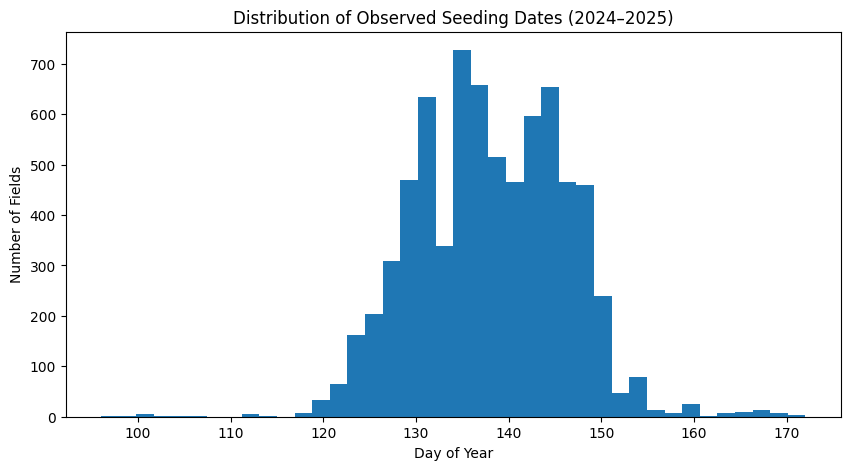

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df_actual_seeding_dates['DOY'], bins=40)
plt.xlabel('Day of Year')
plt.ylabel('Number of Fields')
plt.title('Distribution of Observed Seeding Dates (2024–2025)')
plt.show()


In [21]:
#Summary statistics
df_actual_seeding_dates.groupby('Year')['DOY'].describe()


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2024,2824.0,141.291785,7.386347,120.0,136.0,141.0,146.0,172.0
2025,4416.0,135.954710,7.928230,96.0,130.0,135.0,142.0,168.0


#### Seeding Dates by Year

<Figure size 800x500 with 0 Axes>

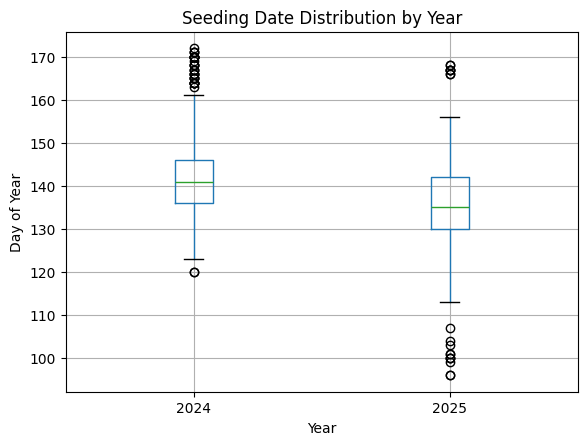

In [22]:
plt.figure(figsize=(8,5))
df_actual_seeding_dates.boxplot(column='DOY', by='Year')
plt.ylabel('Day of Year')
plt.title('Seeding Date Distribution by Year')
plt.suptitle('')
plt.show()


##### Mean & variability per township

In [23]:
township_stats = (
    df_actual_seeding_dates.groupby(['Township', 'Year'])
      .agg(
          mean_doy=('DOY', 'mean'),
          std_doy=('DOY', 'std'),
          n_fields=('Field', 'count')
      )
      .reset_index()
)

township_stats


,Township,Year,mean_doy,std_doy,n_fields
0,1-1-W2,2024,138.000000,NaN,1
1,1-1-W2,2025,129.666667,2.065591,6
2,1-10-W1,2024,138.000000,0.000000,2
3,1-10-W1,2025,145.666667,2.188122,12
4,1-10-W2,2024,137.000000,NaN,1
...,...,...,...,...,...
1222,9-22-W2,2024,137.500000,2.886751,4
1223,9-25-W4,2025,123.000000,NaN,1
1224,9-26-W4,2025,123.000000,0.000000,5
1225,9-32-W1,2024,166.000000,3.391165,5


In [24]:
# Identify townships with large internal spread
township_stats.sort_values('std_doy', ascending=False).head(10)


,Township,Year,mean_doy,std_doy,n_fields
1061,52-22-W3,2024,150.000000,19.629909,4
893,46-6-W4,2025,111.250000,17.613915,4
321,25-21-W4,2025,109.333333,17.039171,3
1143,7-10-W2,2025,151.750000,16.580611,4
1023,50-21-W3,2024,140.400000,16.024980,5
1045,51-20-W3,2024,152.800000,15.774804,10
1047,51-21-W3,2024,153.600000,15.159156,5
1021,50-20-W3,2024,140.400000,14.592235,10
813,44-25-W2,2025,130.600000,13.202273,5
1154,7-31-W1,2024,155.500000,12.660964,6


### Soil Type Analysis

<Figure size 1200x500 with 0 Axes>

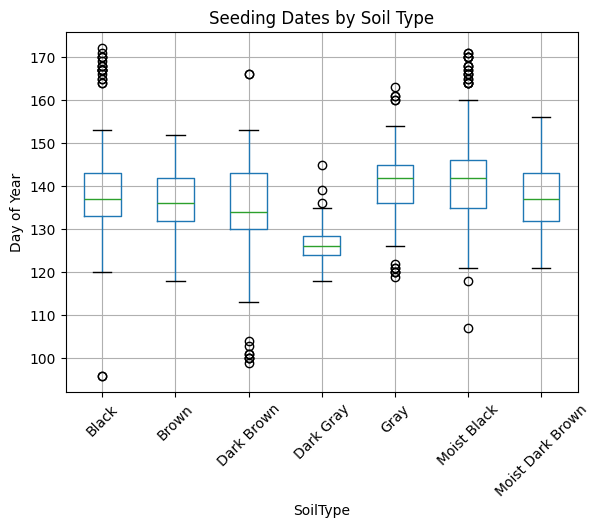

In [25]:
plt.figure(figsize=(12,5))
df_actual_seeding_dates.boxplot(column='DOY', by='SoilType', rot=45)
plt.ylabel('Day of Year')
plt.title('Seeding Dates by Soil Type')
plt.suptitle('')
plt.show()


In [26]:
df_actual_seeding_dates.groupby(['SoilType', 'Year'])['DOY'].describe()


count        mean       std    min    25%    50%  \
SoilType         Year                                                      
Black            2024   769.0  140.700910  6.615678  125.0  136.0  140.0   
                 2025  1308.0  136.270642  7.270708   96.0  132.0  135.0   
Brown            2024   195.0  139.046154  5.214267  131.0  134.0  139.0   
                 2025   362.0  135.270718  6.920096  118.0  131.0  134.0   
Dark Brown       2024   324.0  137.617284  6.002204  123.0  133.0  137.0   
                 2025   971.0  135.128733  9.149216   99.0  129.0  132.0   
Dark Gray        2024    72.0  127.000000  3.692398  120.0  125.0  127.0   
                 2025   159.0  126.119497  3.784319  118.0  124.0  126.0   
Gray             2024   370.0  144.272973  5.528304  128.0  143.0  144.0   
                 2025   250.0  135.864000  5.711039  119.0  132.0  135.5   
Moist Black      2024   860.0  144.493023  7.543815  124.0  139.0  144.0   
                 2025  1001.0  138.098901  7.114156  107.0  133.0  138.0   
Moist Dark Brown 2024   234.0  138.111111  5.696589  124.0  135.0  139.0   
                 2025   365.0  136.164384  8.767155  121.0  129.0  135.0   

                         75%    max  
SoilType         Year                
Black            2024  145.0  172.0  
                 2025  142.0  168.0  
Brown            2024  144.0  150.0  
                 2025  139.0  152.0  
Dark Brown       2024  143.0  150.0  
                 2025  144.0  166.0  
Dark Gray        2024  128.0  145.0  
                 2025  129.0  139.0  
Gray             2024  148.0  163.0  
                 2025  140.0  152.0  
Moist Black      2024  149.0  171.0  
                 2025  144.0  153.0  
Moist Dark Brown 2024  142.0  148.0  
                 2025  144.0  156.0

## EDA climate data

#### Filter years 2024 and 2025, then keep only April to July 

- We will be merging this dataframe with actual seeding dates later

In [27]:
df_climate_2011_2025 = pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/raw/twn_climate_11_25.parquet')
df_climate_2011_2025

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,2011-04-01,0.000000,-1.128510,-0.378265,-0.921661,-1.400726,-1.319916,-1.363129,Moist Black,2011,0.000000
1,1-1-E1,2011-04-02,0.000000,-0.723480,1.563629,-0.227844,-1.312836,-1.186127,-1.256714,Moist Black,2011,0.000000
2,1-1-E1,2011-04-03,0.000000,0.279449,1.680328,0.521240,-1.174652,-1.015717,-1.087891,Moist Black,2011,0.000000
3,1-1-E1,2011-04-04,0.000000,-0.317963,0.535065,0.037964,-1.009857,-0.903656,-0.955689,Moist Black,2011,0.000000
4,1-1-E1,2011-04-05,0.000000,-0.296234,3.323883,0.354919,-0.896576,-0.778168,-0.847778,Moist Black,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
23204974,S-L-WS,2025-06-26,14.834946,14.580963,24.576813,18.981750,15.436432,18.704254,16.426819,Black,2025,532.935943
23204975,S-L-WS,2025-06-27,14.143265,14.195221,25.900543,20.132263,16.775543,19.804840,18.219482,Black,2025,547.079208
23204976,S-L-WS,2025-06-28,12.594833,15.805817,22.680084,18.950317,17.495270,19.928131,18.500977,Black,2025,559.674041
23204977,S-L-WS,2025-06-29,13.200958,15.467194,21.337310,17.548798,16.285553,18.522125,17.202820,Black,2025,572.874999


In [28]:
import pandas as pd

# Ensure Date is datetime
df_climate_2011_2025['Date'] = pd.to_datetime(df_climate_2011_2025['Date'])

# Filter for years with observed seeding dates
df_climate_2024_2025 = df_climate_2011_2025[df_climate_2011_2025['Year'].isin([2024, 2025])]

# Keep only April–July
df_climate_2024_2025 = df_climate_2024_2025[df_climate_2024_2025['Date'].dt.month.between(4, 7)]

# Optional: reset index
df_climate_2024_2025 = df_climate_2024_2025.reset_index(drop=True)

df_climate_2024_2025.head()


,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,2024-04-01,0.000000,-0.954193,0.417877,-0.447327,-1.000336,-0.932220,-0.969635,Moist Black,2024,0.000000
1,1-1-E1,2024-04-02,0.000000,-0.127289,2.319488,0.402985,-0.927338,-0.804779,-0.873047,Moist Black,2024,0.000000
2,1-1-E1,2024-04-03,0.000000,-0.273773,5.952057,1.120544,-0.793304,-0.632660,-0.738159,Moist Black,2024,0.000000
3,1-1-E1,2024-04-04,0.000000,-0.348236,7.296295,1.664856,-0.613617,-0.434906,-0.553986,Moist Black,2024,0.000000
4,1-1-E1,2024-04-05,0.508499,-0.096771,8.319244,2.330750,-0.412933,-0.198334,-0.342163,Moist Black,2024,0.508499


## Merge Seeding dates with climate data - version 1

In [29]:
df_actual_seeding_dates

,Field,Township,SoilType,Year,SeedingDate,DOY
0,NW-2-50-13-W4,50-13-W4,Black,2024,2024-05-27,148
1,SW-2-50-13-W4,50-13-W4,Black,2024,2024-05-27,148
2,SE-10-50-13-W4,50-13-W4,Black,2024,2024-05-28,149
3,NE-15-49-13-W4,49-13-W4,Black,2024,2024-05-29,150
4,NW-15-49-13-W4,49-13-W4,Black,2024,2024-05-29,150
...,...,...,...,...,...,...
7242,SW-18-10-12-W2,10-12-W2,Dark Brown,2025,2025-05-28,148
7243,SE-17-10-12-W2,10-12-W2,Dark Brown,2025,2025-05-26,146
7244,NW-17-10-12-W2,10-12-W2,Dark Brown,2025,2025-05-26,146
7245,SE-7-10-12-W2,10-12-W2,Dark Brown,2025,2025-05-31,151


#### Prepare both tables

In [30]:
import pandas as pd
df_seed = df_actual_seeding_dates.copy()
df_climate = df_climate_2024_2025.copy()

# Seeding table
df_seed['Year'] = df_seed['Year'].astype(int)
df_seed['Township'] = df_seed['Township'].astype(str)

# Climate table
df_climate['Date'] = pd.to_datetime(df_climate['Date'])
df_climate['Year'] = df_climate['Year'].astype(int)
df_climate['Township'] = df_climate['Township'].astype(str)
# Add DOY (useful later)
df_climate['DOY'] = df_climate['Date'].dt.dayofyear


#### Since multiple fields exist per township:

In [31]:
seed_township = (
    df_seed
    .groupby(['Township', 'Year'])
    .agg(
        Seeding_DOY=('DOY', 'median'),
        SoilType=('SoilType', 'first')
    )
    .reset_index()
)
seed_township

,Township,Year,Seeding_DOY,SoilType
0,1-1-W2,2024,138.0,Dark Brown
1,1-1-W2,2025,129.0,Dark Brown
2,1-10-W1,2024,138.0,Moist Black
3,1-10-W1,2025,146.0,Moist Black
4,1-10-W2,2024,137.0,Dark Brown
...,...,...,...,...
1222,9-22-W2,2024,137.5,Brown
1223,9-25-W4,2025,123.0,Moist Dark Brown
1224,9-26-W4,2025,123.0,Moist Dark Brown
1225,9-32-W1,2024,165.0,Black


In [32]:
seed_township['Seeding_DOY'] = (
    seed_township['Seeding_DOY']
    .round()
    .astype(int)
)


In [33]:
# Merge with climate table

df_merged = df_climate.merge(
    seed_township,
    on=['Township', 'Year'],
    how='inner'
)


### Keep only the pre seeeding dates - (climate data after the seeding date are removed)

In [34]:
df_merged = df_merged[df_merged['DOY'] <= df_merged['Seeding_DOY']]
df_merged


,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType_x,Year,Cumulative_GDD,DOY,Seeding_DOY,SoilType_y
0,1-1-W2,2024-04-01,0.000000,-1.049896,1.029205,-0.357300,-1.213226,-1.109955,-1.165436,Dark Brown,2024,0.000000,92,138,Dark Brown
1,1-1-W2,2024-04-02,0.000000,-0.211273,5.853180,1.230042,-1.093353,-0.847748,-1.001129,Dark Brown,2024,0.000000,93,138,Dark Brown
2,1-1-W2,2024-04-03,0.000000,-0.642914,6.132233,1.036224,-0.820648,-0.646332,-0.759979,Dark Brown,2024,0.000000,94,138,Dark Brown
3,1-1-W2,2024-04-04,1.462219,0.071686,8.292389,2.582092,-0.617523,-0.302094,-0.514923,Dark Brown,2024,1.462219,95,138,Dark Brown
4,1-1-W2,2024-04-05,2.806824,0.295807,9.219147,3.362732,-0.268402,0.120026,-0.138245,Dark Brown,2024,4.269043,96,138,Dark Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127987,9-32-W1,2025-05-24,6.382599,7.646637,18.124420,12.828735,9.759918,12.602448,10.992310,Black,2025,66.758103,144,148,Black
127988,9-32-W1,2025-05-25,7.472122,6.746979,19.652252,13.358704,10.018463,13.402252,11.716431,Black,2025,74.230225,145,148,Black
127989,9-32-W1,2025-05-26,8.915909,8.960358,20.008210,14.619995,11.406403,14.160553,12.795166,Black,2025,83.146134,146,148,Black
127990,9-32-W1,2025-05-27,9.019836,10.059967,20.257965,15.346283,12.242828,14.741608,13.531738,Black,2025,92.165970,147,148,Black


In [35]:
df_merged.columns

Index(['Township', 'Date', 'GDD', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'SoilType_x', 'Year', 'Cumulative_GDD', 'DOY',
       'Seeding_DOY', 'SoilType_y'],
      dtype='object')

In [36]:
df_merged = df_merged.rename(columns = {'SoilType_x': 'SoilType'})
df_merged = df_merged[['Township', 'Date', 'GDD', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'SoilType', 'Year', 'Cumulative_GDD', 'DOY',
       'Seeding_DOY']]

In [37]:
df_merged

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD,DOY,Seeding_DOY
0,1-1-W2,2024-04-01,0.000000,-1.049896,1.029205,-0.357300,-1.213226,-1.109955,-1.165436,Dark Brown,2024,0.000000,92,138
1,1-1-W2,2024-04-02,0.000000,-0.211273,5.853180,1.230042,-1.093353,-0.847748,-1.001129,Dark Brown,2024,0.000000,93,138
2,1-1-W2,2024-04-03,0.000000,-0.642914,6.132233,1.036224,-0.820648,-0.646332,-0.759979,Dark Brown,2024,0.000000,94,138
3,1-1-W2,2024-04-04,1.462219,0.071686,8.292389,2.582092,-0.617523,-0.302094,-0.514923,Dark Brown,2024,1.462219,95,138
4,1-1-W2,2024-04-05,2.806824,0.295807,9.219147,3.362732,-0.268402,0.120026,-0.138245,Dark Brown,2024,4.269043,96,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127987,9-32-W1,2025-05-24,6.382599,7.646637,18.124420,12.828735,9.759918,12.602448,10.992310,Black,2025,66.758103,144,148
127988,9-32-W1,2025-05-25,7.472122,6.746979,19.652252,13.358704,10.018463,13.402252,11.716431,Black,2025,74.230225,145,148
127989,9-32-W1,2025-05-26,8.915909,8.960358,20.008210,14.619995,11.406403,14.160553,12.795166,Black,2025,83.146134,146,148
127990,9-32-W1,2025-05-27,9.019836,10.059967,20.257965,15.346283,12.242828,14.741608,13.531738,Black,2025,92.165970,147,148


In [38]:
#Get he unique township count
df_merged['Township'].nunique()

1017

#### How many unique townships appear in both years (2024 and 2025)

In [39]:
townships_2024 = set(df_merged[df_merged['Year'] == 2024]['Township'].unique())
townships_2025 = set(df_merged[df_merged['Year'] == 2025]['Township'].unique())

common_townships = townships_2024.intersection(townships_2025)

len(common_townships)


210

#### Check whether there are multiple rows for one township

In [40]:
# Check whether there are multiple rows for one township
grouped = df_merged.groupby(['Township', 'Year', 'Date']).size().reset_index(name='n_rows')
grouped.head()


,Township,Year,Date,n_rows
0,1-1-W2,2024,2024-04-01,1
1,1-1-W2,2024,2024-04-02,1
2,1-1-W2,2024,2024-04-03,1
3,1-1-W2,2024,2024-04-04,1
4,1-1-W2,2024,2024-04-05,1


In [41]:
grouped[grouped['n_rows']> 1]

,Township,Year,Date,n_rows


#### How many townships exist in each year.

In [42]:
township_count_by_year = (
    df_merged.groupby('Year')['Township']
      .nunique()
      .reset_index(name='n_unique_townships')
)

township_count_by_year


,Year,n_unique_townships
0,2024,528
1,2025,699


#### Unique townships per soil type by year

In [43]:
townships_per_soil_year = (
    df_merged.groupby(['Year', 'SoilType'])['Township']
      .nunique()
      .reset_index(name='n_unique_townships')
      .sort_values(['Year', 'n_unique_townships'], ascending=[True, False])
)

townships_per_soil_year


,Year,SoilType,n_unique_townships
5,2024,Moist Black,170
0,2024,Black,133
4,2024,Gray,69
2,2024,Dark Brown,62
6,2024,Moist Dark Brown,46
1,2024,Brown,35
3,2024,Dark Gray,13
7,2025,Black,216
12,2025,Moist Black,188
9,2025,Dark Brown,123


In [51]:
# Save the merged dataframe as a parquet for EDA

df_merged.to_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/raw/seeding_dates_&_climate_merged.parquet', index = False)

## Aggregate the merged data

In [44]:
df_merged.columns

Index(['Township', 'Date', 'GDD', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'SoilType', 'Year', 'Cumulative_GDD', 'DOY',
       'Seeding_DOY'],
      dtype='object')

In [45]:
df_pre = df_merged[df_merged['DOY'] <= df_merged['Seeding_DOY']].copy()


#### Compute mean soil temperatures per Township–Year

In [46]:
soil_cols = [
    'Soil_temp_l1_min',
    'Soil_temp_l1_max',
    'Soil_temp_l1_mean',
    'Soil_temp_l2_min',
    'Soil_temp_l2_max',
    'Soil_temp_l2_mean'
]

soil_means = (
    df_pre
    .groupby(['Township', 'Year'])[soil_cols]
    .mean()
    .reset_index()
)



#### Extract seeding-day information ONLY

In [47]:
seeding_day_info = (
    df_merged[df_merged['DOY'] == df_merged['Seeding_DOY']]
    [['Township', 'Year', 'Date', 'Cumulative_GDD', 'Seeding_DOY']]
    .drop_duplicates()
)


#### Merge soil means with seeding-day info

In [48]:
final_agg = soil_means.merge(
    seeding_day_info,
    on=['Township', 'Year'],
    how='left'
)


In [49]:
# One row per township–year
assert final_agg.groupby(['Township', 'Year']).size().max() == 1

# No missing seeding GDD
final_agg['Cumulative_GDD'].isna().sum()


0

In [50]:
final_agg.to_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/processed/aggregated_seeding_dates_&_climate.parquet', index = False)
